Objectives There is considerable promise for using commercial wearable devices for measuring physical activity at the population level. The objective of this study was to examine whether commercial wearable devices could accurately predict lying, sitting, and different physical activity intensity in a lab based protocol. Methods We recruited a convenience sample of **46 participants** **(26 women)** to wear three devices, a **GENEActiv**, and **Apple Watch Series 2**, a **Fitbit Charge HR2**. Participants completed a **65-minute protocol with 40-minutes of total treadmill time and 25-minutes of sitting or lying time.** Indirect calorimetry was used to measure energy expenditure. The outcome variable for the study was the activity class; **lying, sitting, walking self-paced, 3 METS, 5 METS, and 7 METS. **Minute-by-minute heart rate, steps, distance, and calories **bold text** from Apple Watch and Fitbit were included in four different machine learning models. Results Our analysis dataset included 3656 and 2608 minutes of Apple Watch and Fitbit data, respectively. We test **decision trees, support vector machines, random forest, and rotation forest models.** Rotation forest models had the highest classification accuracies at 82.6% for Apple Watch and 89.3% for Fitbit. Classification accuracies for Apple Watch data ranged from 72.5% for sitting to 89.0% for 7 METS. For Fitbit, accuracies varied between 86.2 for sitting to 92.6% for 7 METS. Conclusion This study demonstrated that commercial wearable devices, Apple Watch and Fitbit, were able to predict physical activity type with a reasonable accuracy. The results support the use of minute by minute data from Apple Watch and Fitbit combined machine learning approaches for scalable physical activity type classification at the population level.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fitbit watch dataset

In [5]:
df=pd.read_csv('/content/data_for_weka_fb.csv')

In [6]:
df.head()

Unnamed: 0  age  gender  height  weight  Fitbit.Steps_LE  Fitbit.Heart_LE  \
0           1   20       1   168.0    65.4              1.0       132.000000   
1           2   20       1   168.0    65.4              1.0       132.777778   
2           3   20       1   168.0    65.4              1.0       129.888889   
3           4   20       1   168.0    65.4              1.0       129.142857   
4          11   20       1   168.0    65.4              1.0       134.555556   

   Fitbit.Calories_LE  Fitbit.Distance_LE  EntropyFitbitHeartPerDay_LE  \
0                 1.0                 1.0                     5.938588   
1                 1.0                 1.0                     5.938588   
2                 1.0                 1.0                     5.938588   
3                 1.0                 1.0                     5.938588   
4                 3.5                 1.0                     5.938588   

   EntropyFitbitStepsPerDay_LE  RestingFitbitHeartrate_LE  \
0                     2.179799                 130.428571   
1                     2.179799                 130.428571   
2                     2.179799                 130.428571   
3                     2.179799                 130.428571   
4                     2.179799                 130.428571   

   CorrelationFitbitHeartrateSteps_LE  NormalizedFitbitHeartrate_LE  \
0                            1.000000                      1.571429   
1                            1.000000                      2.349206   
2                            1.000000                     -0.539683   
3                            1.000000                     -1.285714   
4                           -0.493589                      4.126984   

   FitbitIntensity_LE  SDNormalizedFitbitHR_LE  FitbitStepsXDistance_LE  \
0            0.022587                 1.000000                      1.0   
1            0.033767                 1.000000                      1.0   
2           -0.007757                 1.000000                      1.0   
3           -0.018480                 1.000000                      1.0   
4            0.059320                 1.368007                      1.0   

  activity_trimmed  
0            Lying  
1            Lying  
2            Lying  
3            Lying  
4   Self Pace walk

In [19]:
df

Unnamed: 0  age  gender  height  weight  Fitbit.Steps_LE  \
0              1   20       1   168.0    65.4              1.0   
1              2   20       1   168.0    65.4              1.0   
2              3   20       1   168.0    65.4              1.0   
3              4   20       1   168.0    65.4              1.0   
4             11   20       1   168.0    65.4              1.0   
...          ...  ...     ...     ...     ...              ...   
2603        3666   46       0   157.5    71.4              1.0   
2604        3667   46       0   157.5    71.4              1.0   
2605        3668   46       0   157.5    71.4              1.0   
2606        3669   46       0   157.5    71.4              1.0   
2607        3670   46       0   157.5    71.4              1.0   

      Fitbit.Heart_LE  Fitbit.Calories_LE  Fitbit.Distance_LE  \
0          132.000000                 1.0                 1.0   
1          132.777778                 1.0                 1.0   
2          129.888889                 1.0                 1.0   
3          129.142857                 1.0                 1.0   
4          134.555556                 3.5                 1.0   
...               ...                 ...                 ...   
2603        35.000000                20.5                 1.0   
2604        35.000000                20.5                 1.0   
2605        35.000000                20.5                 1.0   
2606        35.000000                20.5                 1.0   
2607        35.000000                20.5                 1.0   

      EntropyFitbitHeartPerDay_LE  EntropyFitbitStepsPerDay_LE  \
0                        5.938588                     2.179799   
1                        5.938588                     2.179799   
2                        5.938588                     2.179799   
3                        5.938588                     2.179799   
4                        5.938588                     2.179799   
...                           ...                          ...   
2603                     0.000000                     0.000000   
2604                     0.000000                     0.000000   
2605                     0.000000                     0.000000   
2606                     0.000000                     0.000000   
2607                     0.000000                     0.000000   

      RestingFitbitHeartrate_LE  CorrelationFitbitHeartrateSteps_LE  \
0                    130.428571                            1.000000   
1                    130.428571                            1.000000   
2                    130.428571                            1.000000   
3                    130.428571                            1.000000   
4                    130.428571                           -0.493589   
...                         ...                                 ...   
2603                  35.000000                            1.000000   
2604                  35.000000                            1.000000   
2605                  35.000000                            1.000000   
2606                  35.000000                            1.000000   
2607                  35.000000                            1.000000   

      NormalizedFitbitHeartrate_LE  FitbitIntensity_LE  \
0                         1.571429            0.022587   
1                         2.349206            0.033767   
2                        -0.539683           -0.007757   
3                        -1.285714           -0.018480   
4                         4.126984            0.059320   
...                            ...                 ...   
2603                      0.000000            0.000000   
2604                      0.000000            0.000000   
2605                      0.000000            0.000000   
2606                      0.000000            0.000000   
2607                      0.000000            0.000000   

      SDNormalizedFitbitHR_LE  FitbitStepsXDistance_LE activity_trimmed  
0              

In [26]:
df.head()

age  gender  height  weight  Fitbit.Steps_LE  Fitbit.Heart_LE  \
0   20       1   168.0    65.4              1.0       132.000000   
1   20       1   168.0    65.4              1.0       132.777778   
2   20       1   168.0    65.4              1.0       129.888889   
3   20       1   168.0    65.4              1.0       129.142857   
4   20       1   168.0    65.4              1.0       134.555556   

   Fitbit.Calories_LE  Fitbit.Distance_LE  EntropyFitbitHeartPerDay_LE  \
0                 1.0                 1.0                     5.938588   
1                 1.0                 1.0                     5.938588   
2                 1.0                 1.0                     5.938588   
3                 1.0                 1.0                     5.938588   
4                 3.5                 1.0                     5.938588   

   EntropyFitbitStepsPerDay_LE  RestingFitbitHeartrate_LE  \
0                     2.179799                 130.428571   
1                     2.179799                 130.428571   
2                     2.179799                 130.428571   
3                     2.179799                 130.428571   
4                     2.179799                 130.428571   

   CorrelationFitbitHeartrateSteps_LE  NormalizedFitbitHeartrate_LE  \
0                            1.000000                      1.571429   
1                            1.000000                      2.349206   
2                            1.000000                     -0.539683   
3                            1.000000                     -1.285714   
4                           -0.493589                      4.126984   

   FitbitIntensity_LE  SDNormalizedFitbitHR_LE  FitbitStepsXDistance_LE  \
0            0.022587                 1.000000                      1.0   
1            0.033767                 1.000000                      1.0   
2           -0.007757                 1.000000                      1.0   
3           -0.018480                 1.000000                      1.0   
4            0.059320                 1.368007                      1.0   

  activity_trimmed  
0            Lying  
1            Lying  
2            Lying  
3            Lying  
4   Self Pace walk

In [25]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [27]:
df.isnull().sum()

age                                   0
gender                                0
height                                0
weight                                0
Fitbit.Steps_LE                       0
Fitbit.Heart_LE                       0
Fitbit.Calories_LE                    0
Fitbit.Distance_LE                    0
EntropyFitbitHeartPerDay_LE           0
EntropyFitbitStepsPerDay_LE           0
RestingFitbitHeartrate_LE             0
CorrelationFitbitHeartrateSteps_LE    0
NormalizedFitbitHeartrate_LE          0
FitbitIntensity_LE                    0
SDNormalizedFitbitHR_LE               0
FitbitStepsXDistance_LE               0
activity_trimmed                      0
dtype: int64

Exploratory Data Analyses (EDA)

In [28]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'Fitbit.Steps_LE',
       'Fitbit.Heart_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE',
       'EntropyFitbitHeartPerDay_LE', 'EntropyFitbitStepsPerDay_LE',
       'RestingFitbitHeartrate_LE', 'CorrelationFitbitHeartrateSteps_LE',
       'NormalizedFitbitHeartrate_LE', 'FitbitIntensity_LE',
       'SDNormalizedFitbitHR_LE', 'FitbitStepsXDistance_LE',
       'activity_trimmed'],
      dtype='object')

<Axes: xlabel='gender', ylabel='count'>

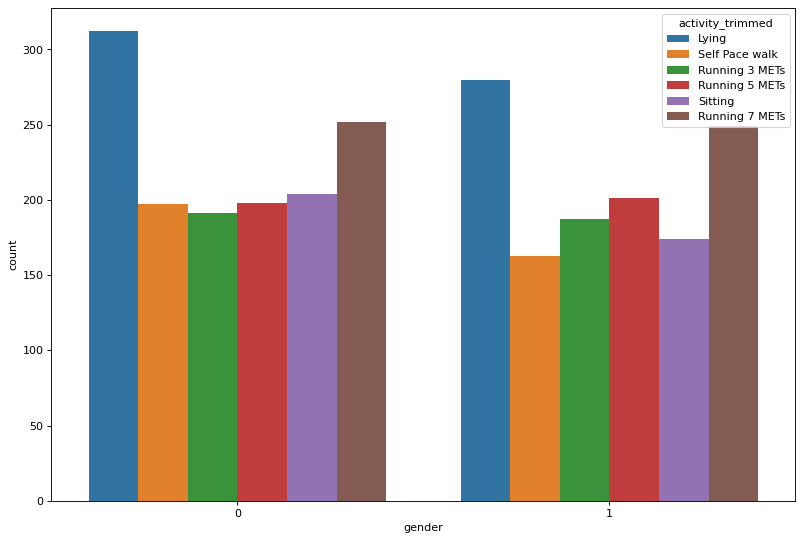

In [36]:
plt.figure(figsize=(12,8),dpi=80)
sns.countplot(x='gender',hue='activity_trimmed',data=df)

<Axes: xlabel='gender', ylabel='EntropyFitbitHeartPerDay_LE'>

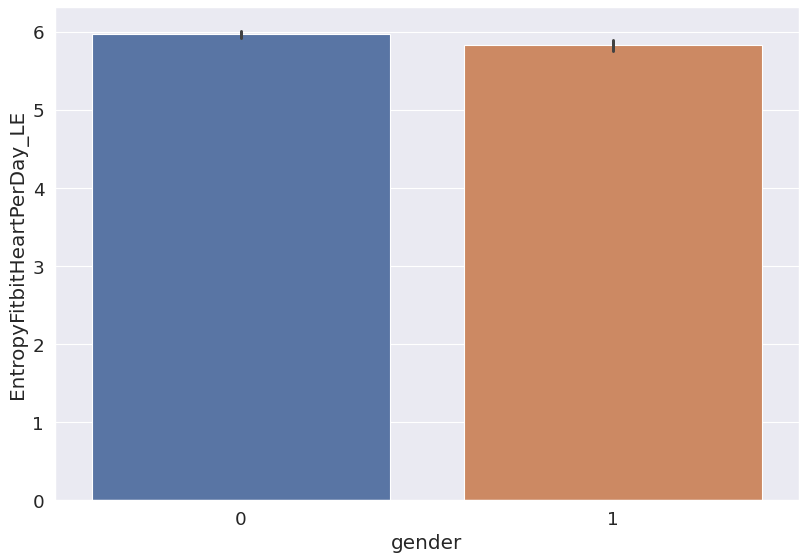

In [99]:
plt.figure(figsize=(12,8),dpi=80)
sns.barplot(df,y='EntropyFitbitHeartPerDay_LE',x='gender')

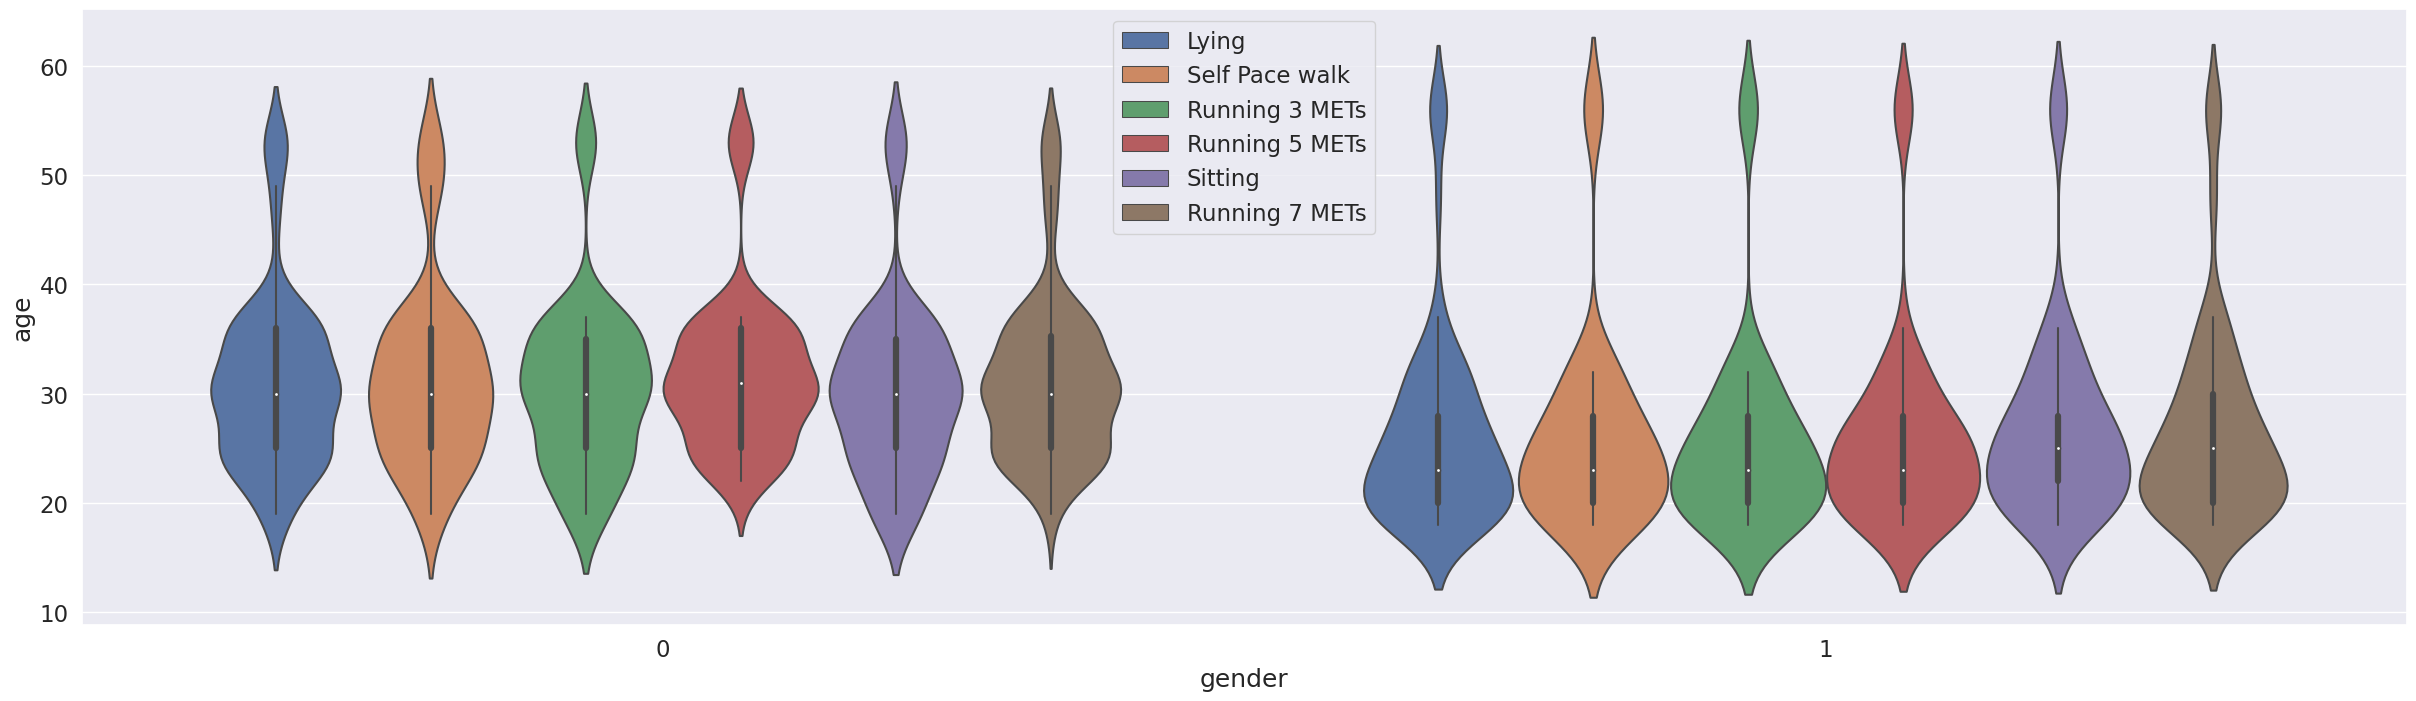

In [107]:
plt.figure(figsize=(30,8),dpi=100)
sns.violinplot(x='gender',y='age',hue='activity_trimmed',data=df)
plt.legend(loc='upper center');

<Axes: xlabel='gender', ylabel='count'>

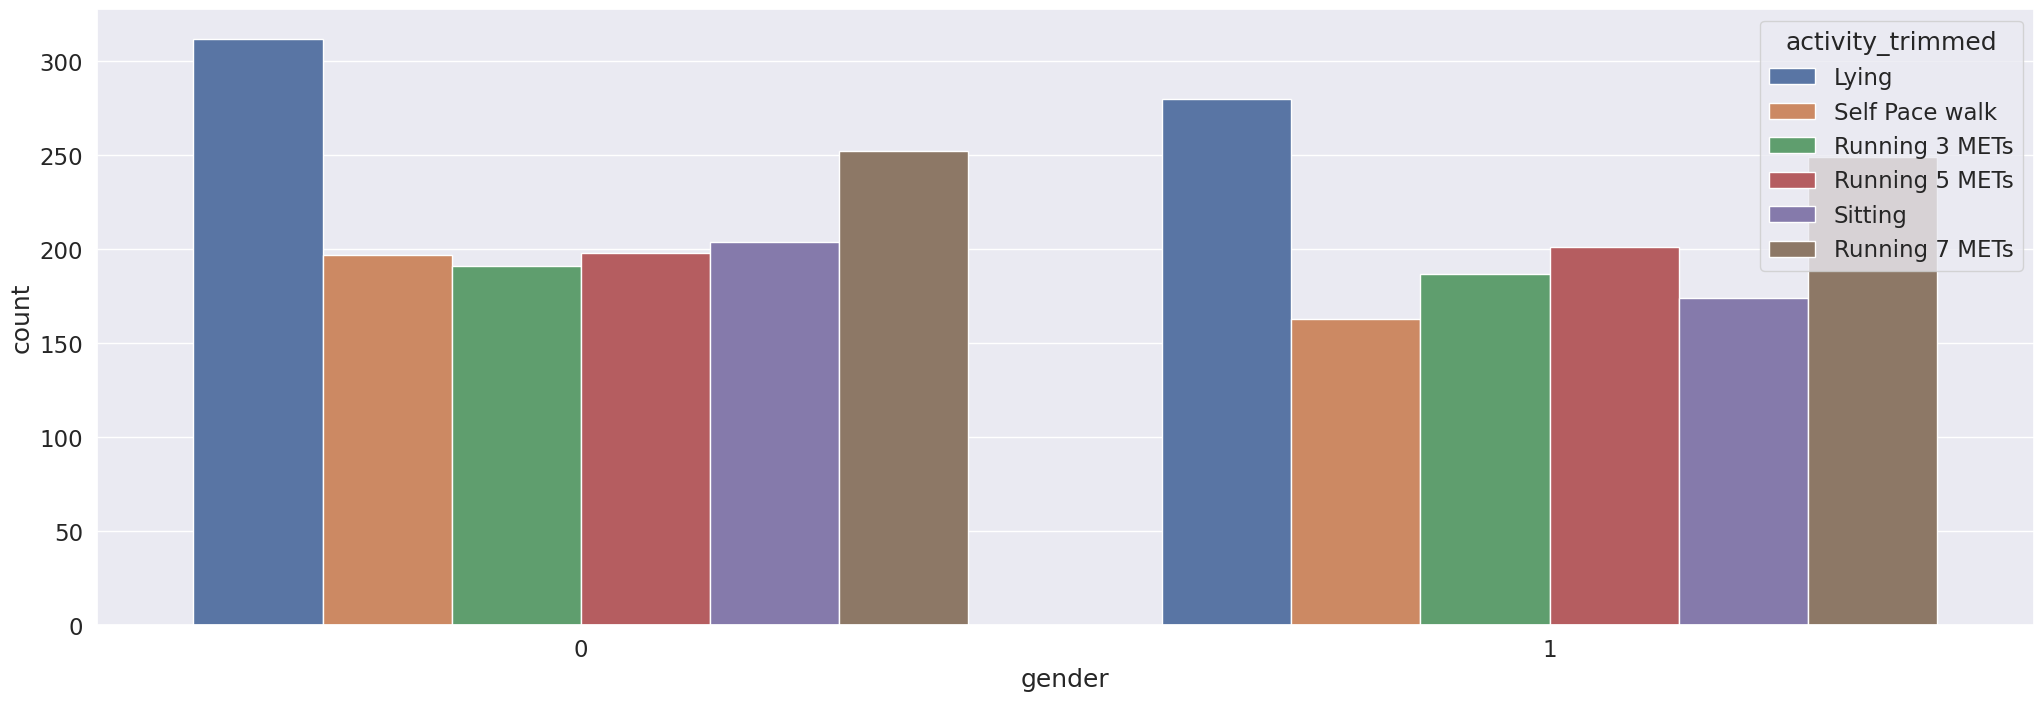

In [117]:
plt.figure(figsize=(25,8),dpi=100)
sns.countplot(x='gender',hue='activity_trimmed',data=df)

<ipython-input-145-86f4b8efb836>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='coolwarm',xticklabels=True,yticklabels=True)


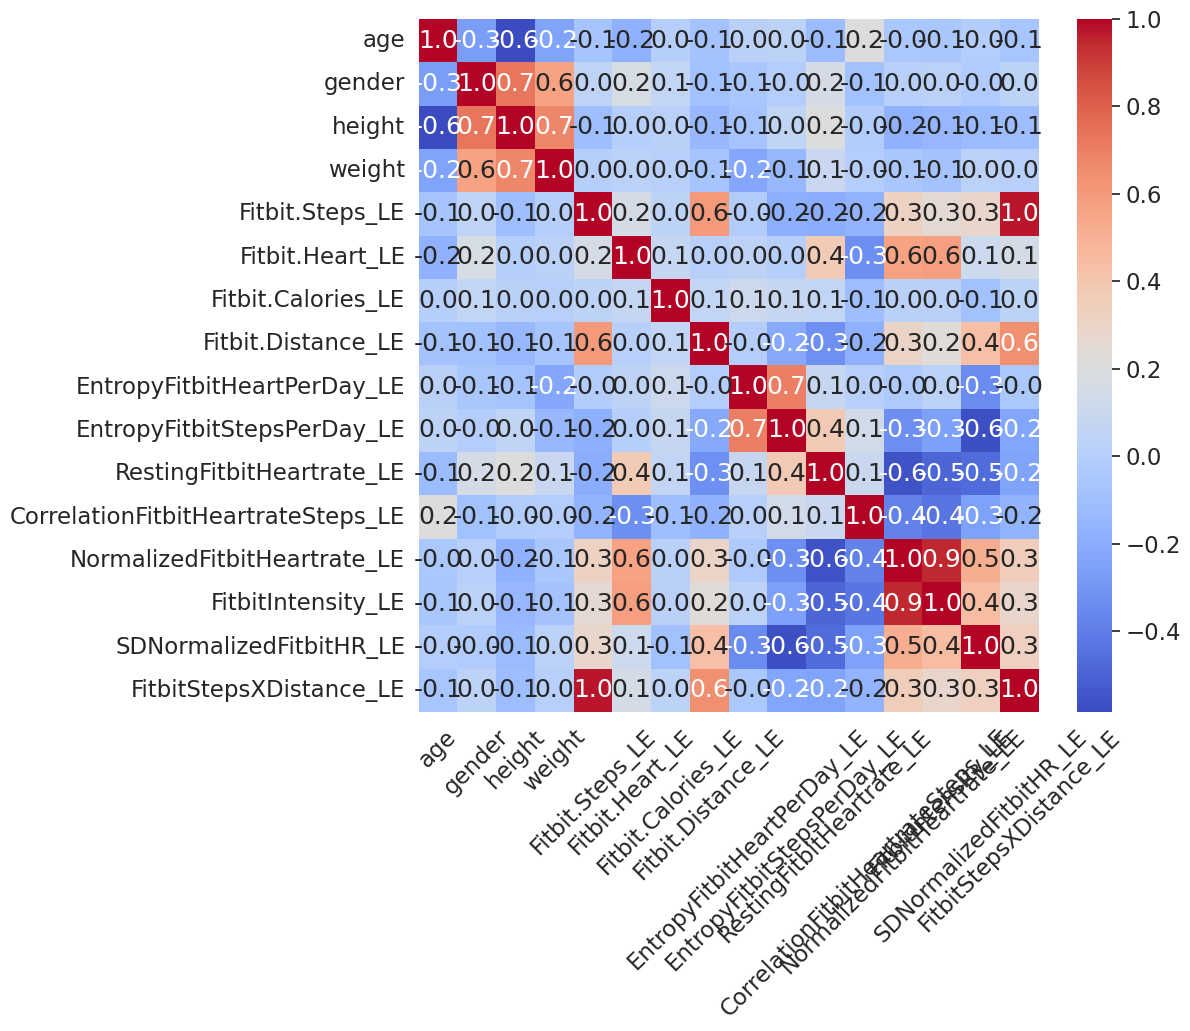

In [145]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(),annot=True,fmt='.1f',cmap='coolwarm',xticklabels=True,yticklabels=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

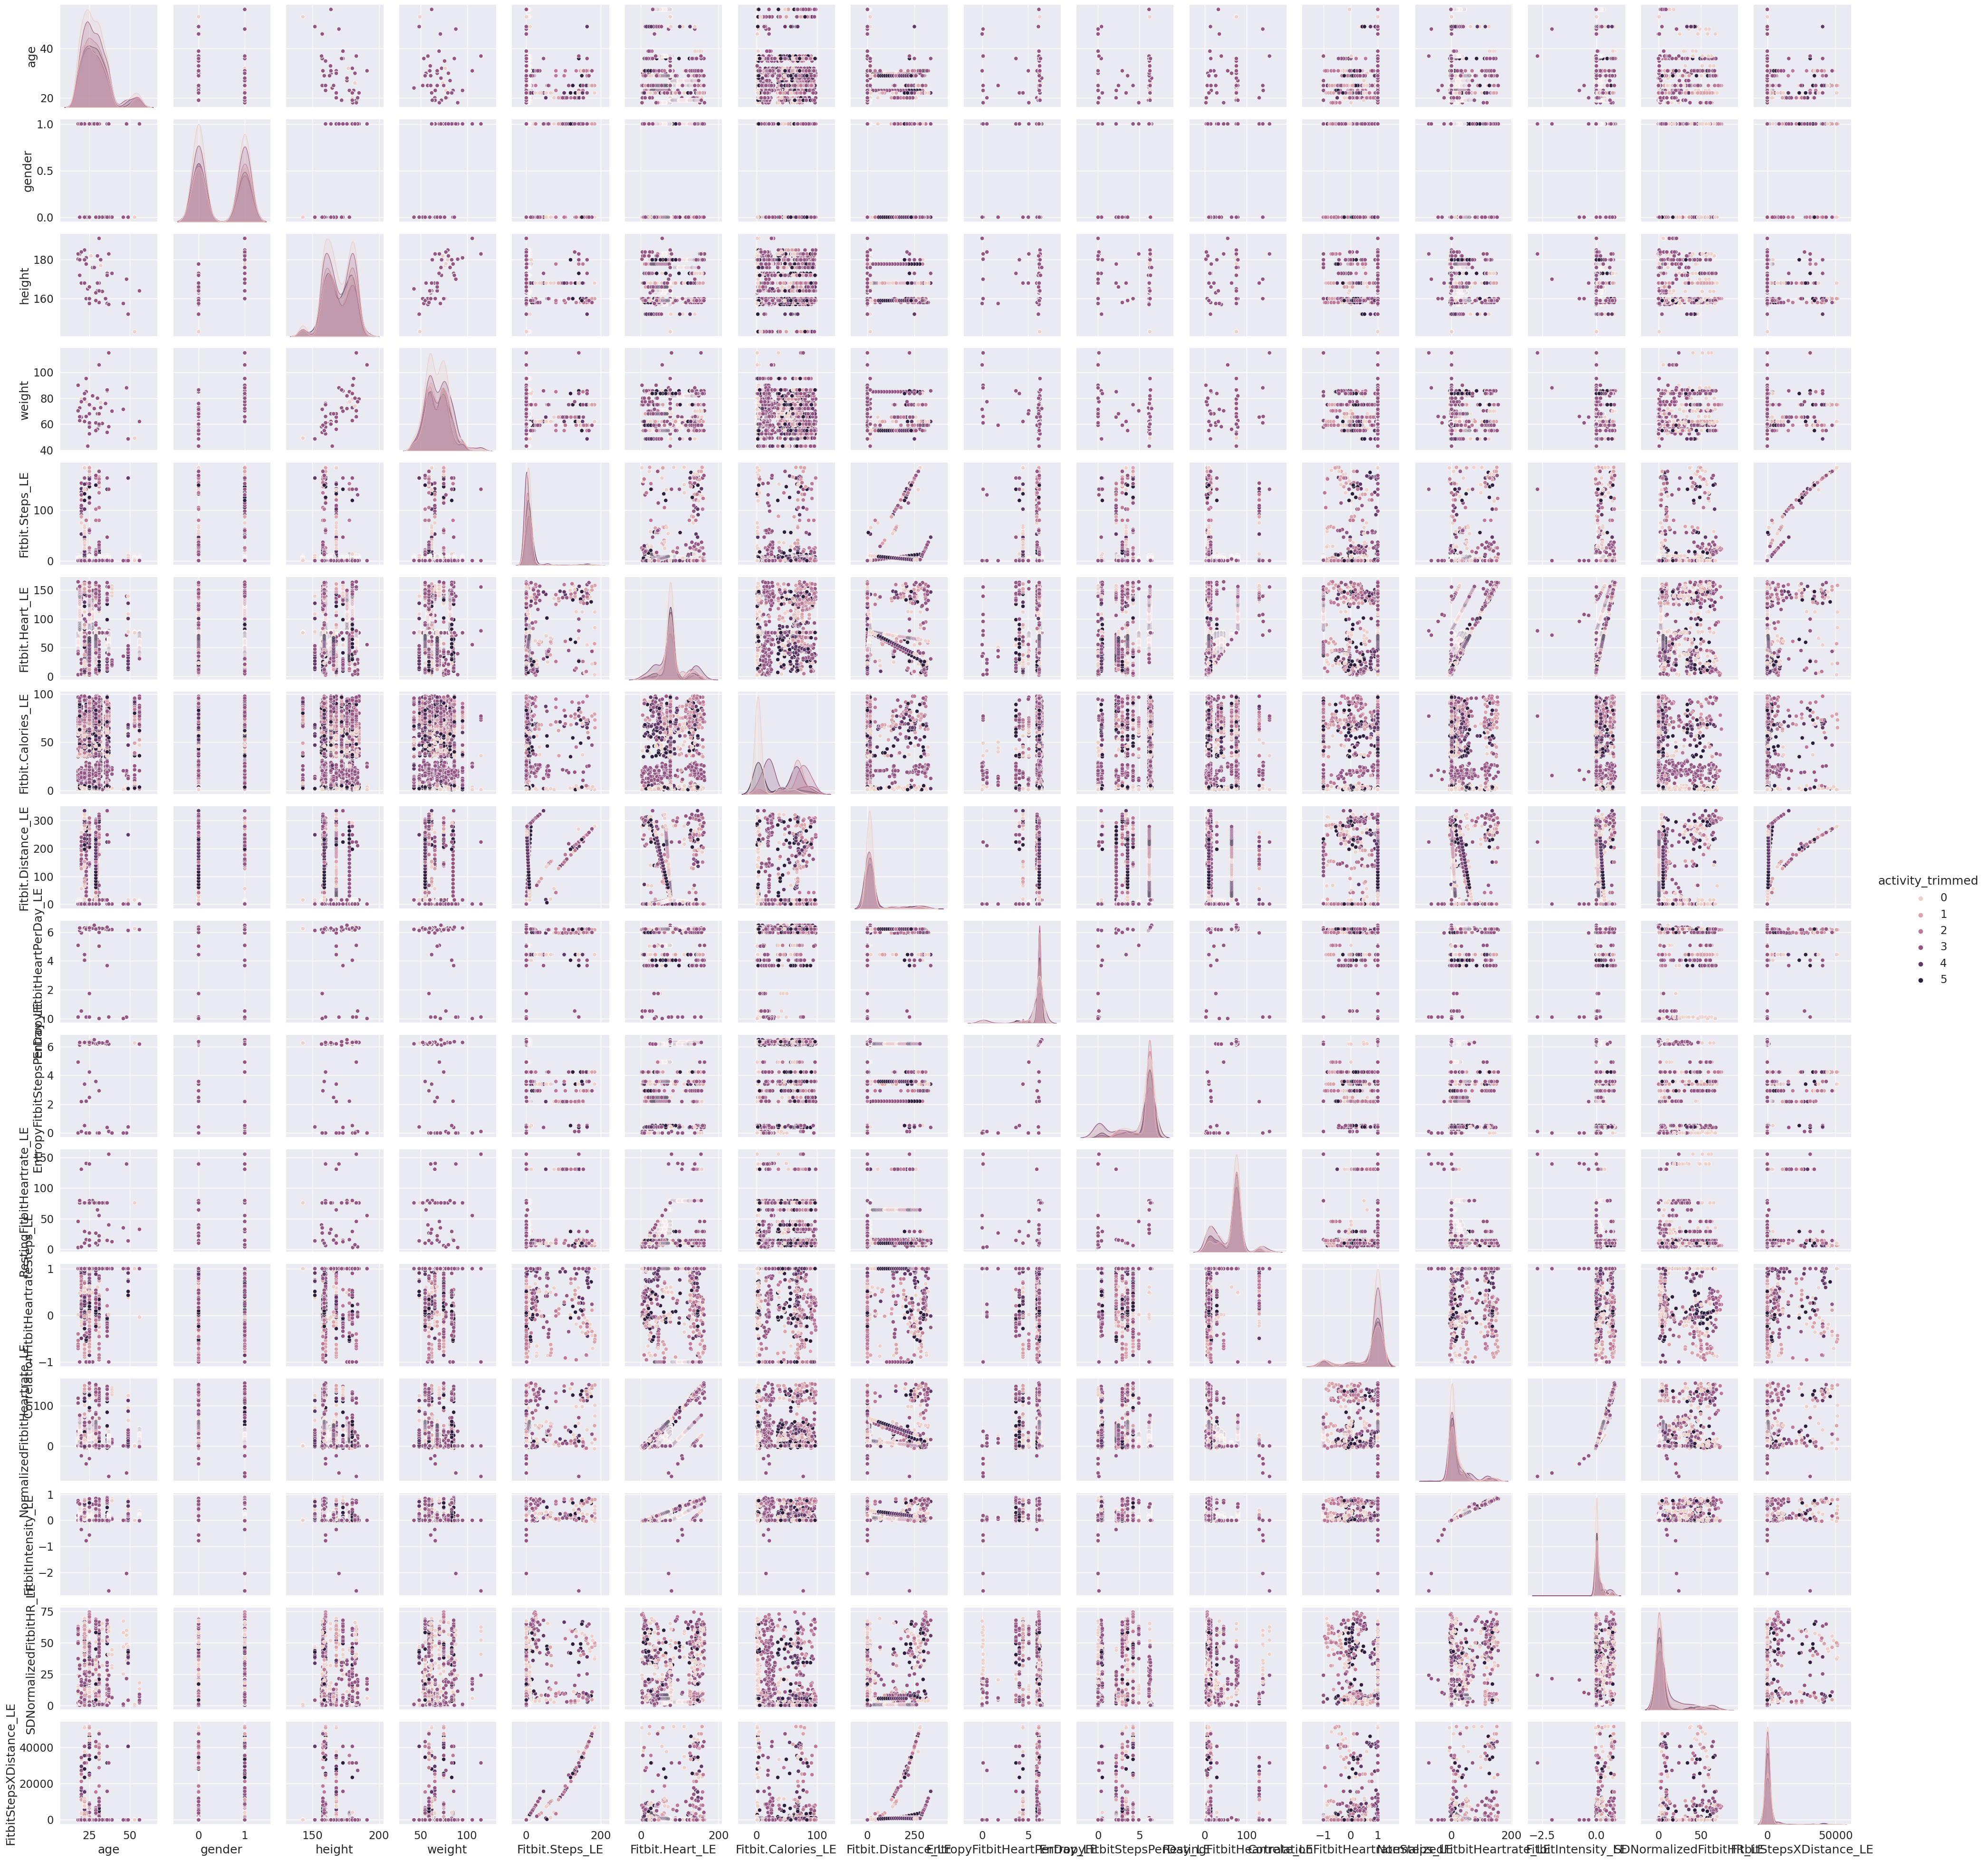

In [164]:
sns.pairplot(df,hue='activity_trimmed')

In [146]:
df['activity_trimmed'].unique()

array(['Lying', 'Self Pace walk', 'Running 3 METs', 'Running 5 METs',
       'Sitting', 'Running 7 METs'], dtype=object)

In [149]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df['activity_trimmed']=le.fit_transform(df['activity_trimmed'])

In [150]:
df

age  gender  height  weight  Fitbit.Steps_LE  Fitbit.Heart_LE  \
0      20       1   168.0    65.4              1.0       132.000000   
1      20       1   168.0    65.4              1.0       132.777778   
2      20       1   168.0    65.4              1.0       129.888889   
3      20       1   168.0    65.4              1.0       129.142857   
4      20       1   168.0    65.4              1.0       134.555556   
...   ...     ...     ...     ...              ...              ...   
2603   46       0   157.5    71.4              1.0        35.000000   
2604   46       0   157.5    71.4              1.0        35.000000   
2605   46       0   157.5    71.4              1.0        35.000000   
2606   46       0   157.5    71.4              1.0        35.000000   
2607   46       0   157.5    71.4              1.0        35.000000   

      Fitbit.Calories_LE  Fitbit.Distance_LE  EntropyFitbitHeartPerDay_LE  \
0                    1.0                 1.0                     5.938588   
1                    1.0                 1.0                     5.938588   
2                    1.0                 1.0                     5.938588   
3                    1.0                 1.0                     5.938588   
4                    3.5                 1.0                     5.938588   
...                  ...                 ...                          ...   
2603                20.5                 1.0                     0.000000   
2604                20.5                 1.0                     0.000000   
2605                20.5                 1.0                     0.000000   
2606                20.5                 1.0                     0.000000   
2607                20.5                 1.0                     0.000000   

      EntropyFitbitStepsPerDay_LE  RestingFitbitHeartrate_LE  \
0                        2.179799                 130.428571   
1                        2.179799                 130.428571   
2                        2.179799                 130.428571   
3                        2.179799                 130.428571   
4                        2.179799                 130.428571   
...                           ...                        ...   
2603                     0.000000                  35.000000   
2604                     0.000000                  35.000000   
2605                     0.000000                  35.000000   
2606                     0.000000                  35.000000   
2607                     0.000000                  35.000000   

      CorrelationFitbitHeartrateSteps_LE  NormalizedFitbitHeartrate_LE  \
0                               1.000000                      1.571429   
1                               1.000000                      2.349206   
2                               1.000000                     -0.539683   
3                               1.000000                     -1.285714   
4                              -0.493589                      4.126984   
...                                  ...                           ...   
2603                            1.000000                      0.000000   
2604                            1.000000                      0.000000   
2605                            1.000000                      0.000000   
2606                            1.000000                      0.000000   
2607                            1.000000                      0.000000   

      FitbitIntensity_LE  SDNormalizedFitbitHR_LE  FitbitStepsXDistance_LE  \
0               0.022587                 1.000000                      1.0   
1               0.033767                 1.000000                      1.0   
2              -0.007757                 1.000000                      1.0   
3              -0.018480                 1.000000                      1.0   
4               0.059320                 1.368007                      1.0   
...                  ...                      ...                      ...   
2603            0.000000

In [152]:
x=df.drop('activity_trimmed',axis=1)
y=df['activity_trimmed']

In [176]:
from sklearn.feature_selection import f_classif
f_scores,p_values=f_classif(x,y)
feature_scores=pd.DataFrame({'features':x.columns,'f_score':f_scores,'p_value':p_values})
feature_scores=feature_scores.sort_values(ascending=False,by='f_score')
print(feature_scores)

                              features     f_score        p_value
6                   Fitbit.Calories_LE  402.171602  3.146704e-320
8          EntropyFitbitHeartPerDay_LE   29.508677   3.079388e-29
9          EntropyFitbitStepsPerDay_LE   28.600342   2.532294e-28
14             SDNormalizedFitbitHR_LE   19.606041   3.204886e-19
11  CorrelationFitbitHeartrateSteps_LE    5.469361   5.168737e-05
4                      Fitbit.Steps_LE    4.796309   2.283974e-04
3                               weight    2.892148   1.310211e-02
10           RestingFitbitHeartrate_LE    2.278022   4.448679e-02
5                      Fitbit.Heart_LE    2.143770   5.759731e-02
7                   Fitbit.Distance_LE    1.628548   1.489662e-01
15             FitbitStepsXDistance_LE    0.888278   4.879296e-01
1                               gender    0.714443   6.125491e-01
12        NormalizedFitbitHeartrate_LE    0.710461   6.155449e-01
2                               height    0.691436   6.299228e-01
0         

In [293]:
from sklearn.model_selection import train_test_split

In [294]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [295]:
from sklearn.preprocessing import StandardScaler

In [296]:
sc=StandardScaler()
scaled_x_train=sc.fit_transform(x_train)
scaled_x_test=sc.transform(x_test)

In [297]:
from sklearn.ensemble import RandomForestClassifier

In [339]:
rf=RandomForestClassifier(random_state=0,bootstrap= False, max_depth= None, max_features= 'auto',
                          min_samples_leaf =1, min_samples_split=5, n_estimators=100)
rf.fit(x_train,y_train)
prediction=rf.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [319]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]}
grid_search = GridSearchCV(rf, param_grid, cv=5)
grid_search.fit(x_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
best_rf_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [340]:
from sklearn.metrics import classification_report,accuracy_score

In [341]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86       200
           1       0.87      0.89      0.88       113
           2       0.85      0.89      0.87       105
           3       0.95      0.94      0.95       170
           4       0.84      0.95      0.89        96
           5       0.85      0.85      0.85        99

    accuracy                           0.89       783
   macro avg       0.88      0.89      0.88       783
weighted avg       0.89      0.89      0.89       783



In [342]:
pridiction=rf.predict(x_train)
print(classification_report(y_train,pridiction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       392
           1       1.00      1.00      1.00       265
           2       1.00      1.00      1.00       294
           3       1.00      1.00      1.00       331
           4       1.00      1.00      1.00       264
           5       1.00      1.00      1.00       279

    accuracy                           1.00      1825
   macro avg       1.00      1.00      1.00      1825
weighted avg       1.00      1.00      1.00      1825



In [343]:
print(x_train.shape)
print(x_test.shape)
print(len(df))
print(1825+783)
print(df['activity_trimmed'].value_counts())

(1825, 16)
(783, 16)
2608
2608
0    592
3    501
2    399
1    378
5    378
4    360
Name: activity_trimmed, dtype: int64


In [344]:
print(accuracy_score(prediction,y_test)*100)

88.63346104725414


In [345]:
rf.predict_proba(x_test)[:1]

array([[0.0025    , 0.08333333, 0.04      , 0.85916667, 0.0025    ,
        0.0125    ]])

In [346]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'Fitbit.Steps_LE',
       'Fitbit.Heart_LE', 'Fitbit.Calories_LE', 'Fitbit.Distance_LE',
       'EntropyFitbitHeartPerDay_LE', 'EntropyFitbitStepsPerDay_LE',
       'RestingFitbitHeartrate_LE', 'CorrelationFitbitHeartrateSteps_LE',
       'NormalizedFitbitHeartrate_LE', 'FitbitIntensity_LE',
       'SDNormalizedFitbitHR_LE', 'FitbitStepsXDistance_LE',
       'activity_trimmed'],
      dtype='object')

In [347]:
y_test.tail(10)

1601    3
342     5
2529    3
1725    5
1099    2
1821    0
1855    1
535     1
727     3
1451    5
Name: activity_trimmed, dtype: int64

In [348]:
x_test.tail(10)

age  gender  height  weight  Fitbit.Steps_LE  Fitbit.Heart_LE  \
1601   19       1   180.0    62.7         1.375256       153.801326   
342    19       0   172.0    72.5         2.133127        75.780210   
2529   36       0   172.0    86.4         2.223684        75.797122   
1725   29       0   163.0    61.0         2.872807        33.839949   
1099   27       1   176.0    81.8         3.407895       131.841839   
1821   31       0   168.0    68.0         1.000000        22.000000   
1855   30       0   168.0    56.0         8.328947        72.552303   
535    32       1   177.0    76.7         6.495182        76.594856   
727    26       1   182.0    74.0         1.947368        75.745518   
1451   28       1   176.0    72.0         9.232057        77.105987   

      Fitbit.Calories_LE  Fitbit.Distance_LE  EntropyFitbitHeartPerDay_LE  \
1601                20.5            1.572112                     6.285402   
342                 13.5           15.778638                     6.108524   
2529                26.5           15.777632                     6.339850   
1725                 1.0            3.855263                     6.189825   
1099                94.5            4.671053                     6.266787   
1821                 1.0            1.000000                     5.021166   
1855                36.0          108.154971                     6.189825   
535                 68.0           15.730170                     6.169925   
727                 18.0           15.780702                     6.409391   
1451                 2.0           15.699761                     6.475733   

      EntropyFitbitStepsPerDay_LE  RestingFitbitHeartrate_LE  \
1601                     6.285402                  79.433141   
342                      6.108524                  75.676135   
2529                     6.339850                  75.686542   
1725                     6.189825                  26.335224   
1099                     6.266787                  79.278743   
1821                     0.000000                  22.000000   
1855                     6.189825                  64.270409   
535                      6.169925                  75.672837   
727                      6.409391                  75.682330   
1451                     6.475733                  75.678500   

      CorrelationFitbitHeartrateSteps_LE  NormalizedFitbitHeartrate_LE  \
1601                                 1.0                     74.368185   
342                                  1.0                      0.104075   
2529                                 1.0                      0.110580   
1725                                 1.0                      7.504726   
1099                                -1.0                     52.563096   
1821                                 1.0                      0.000000   
1855                                 1.0                      8.281894   
535                                  1.0                      0.922019   
727                                  1.0                      0.063189   
1451                                 1.0                      1.427487   

      FitbitIntensity_LE  SDNormalizedFitbitHR_LE  FitbitStepsXDistance_LE  
1601            0.611747                31.776059                 2.162057  
342             0.000830                 0.078776                33.657837  
2529            0.001021                 0.066959                35.084470  
1725            0.045576                 2.272169                11.075427  
1099            0.462210                 2.893503                15.918456  
1821            0.000000                 8.487305                 1.000000  
1855            0.065871                 0.583132               900.817059  
535             0.008208                 0.075447               102.170314  
727             0.000534                 0.063771                30.730840  
1451            0.012272                 0.060872               144.941093

In [354]:
new_data=pd.DataFrame({'age':[19],
                       'gender':[0],
                       'height':[172.0],
                       'weight':[72.5],
                       'Fitbit.Steps_LE':[2.133127],
                       'Fitbit.Heart_LE':[75.780210],
                       'Fitbit.Calories_LE':[13.5],
                       'Fitbit.Distance_LE':[15.778638],
                       'EntropyFitbitHeartPerDay_LE':[6.108524],
                       'EntropyFitbitStepsPerDay_LE':[6.108524],
                       'RestingFitbitHeartrate_LE':[75.676135],
                       'CorrelationFitbitHeartrateSteps_LE':[1.0],
                       'NormalizedFitbitHeartrate_LE':[0.104075],
                       'FitbitIntensity_LE':[0.000830],
                       'SDNormalizedFitbitHR_LE':[0.078776],
                       'FitbitStepsXDistance_LE':[33.657837]})

scaled_new_data=sc.transform(new_data)
prediction_of_new_data=rf.predict(scaled_new_data)
probability_of_event=rf.predict_proba(scaled_new_data)
print('prediction : ',prediction_of_new_data)
print('probability : ',probability_of_event.max()*100)

prediction :  [5]
probability :  39.416666666666664


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
